# Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BAJFINANCE.csv',index_col='Date')

In [3]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
03-01-2000,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
04-01-2000,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
05-01-2000,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
06-01-2000,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
07-01-2000,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

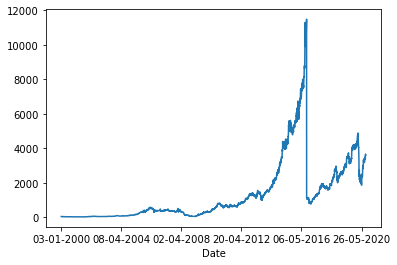

In [5]:
df['VWAP'].plot()

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace=True)

# Feature Engineering

In [8]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
lag_features=['High', 'Low', 'Volume', 'Turnover','Trades']

In [10]:
# Known by domain Knowledge
window1 = 3
window2 = 7

In [11]:
for feature in lag_features:
    df['Rolling_Mean3'+feature] = df[feature].rolling(window1).mean()
    df['Rolling_std3'+feature] = df[feature].rolling(window1).std()
    df['Rolling_Mean7'+feature] = df[feature].rolling(window2).mean()
    df['Rolling_std7'+feature] = df[feature].rolling(window2).std()

In [12]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Rolling_Mean7Volume,Rolling_std7Volume,Rolling_Mean3Turnover,Rolling_std3Turnover,Rolling_Mean7Turnover,Rolling_std7Turnover,Rolling_Mean3Trades,Rolling_std3Trades,Rolling_Mean7Trades,Rolling_std7Trades
Date,,,,,,,,,,,,,,,,,,,,,
01-06-2011,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-06-2011,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-06-2011,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,NaN,NaN,1.274338e+12,1.685216e+12,NaN,NaN,661.000000,670.500559,NaN,NaN
06-06-2011,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,NaN,NaN,1.242081e+12,1.710135e+12,NaN,NaN,278.333333,148.769396,NaN,NaN
07-06-2011,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,NaN,NaN,1.306735e+12,1.652376e+12,NaN,NaN,225.333333,78.270897,NaN,NaN


Drop missing values on rolling means and stds

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(2285, 34)

In [15]:
train_data=df.iloc[:1800]
test_data=df.iloc[1800:]

# Auto Arima on data

In [16]:
from pmdarima import auto_arima

In [17]:
train_data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Rolling_Mean3High', 'Rolling_std3High',
       'Rolling_Mean7High', 'Rolling_std7High', 'Rolling_Mean3Low',
       'Rolling_std3Low', 'Rolling_Mean7Low', 'Rolling_std7Low',
       'Rolling_Mean3Volume', 'Rolling_std3Volume', 'Rolling_Mean7Volume',
       'Rolling_std7Volume', 'Rolling_Mean3Turnover', 'Rolling_std3Turnover',
       'Rolling_Mean7Turnover', 'Rolling_std7Turnover', 'Rolling_Mean3Trades',
       'Rolling_std3Trades', 'Rolling_Mean7Trades', 'Rolling_std7Trades'],
      dtype='object')

In [18]:
arim_features = ['Rolling_Mean3High', 'Rolling_std3High',
       'Rolling_Mean7High', 'Rolling_std7High', 'Rolling_Mean3Low',
       'Rolling_std3Low', 'Rolling_Mean7Low', 'Rolling_std7Low',
       'Rolling_Mean3Volume', 'Rolling_std3Volume', 'Rolling_Mean7Volume',
       'Rolling_std7Volume', 'Rolling_Mean3Turnover', 'Rolling_std3Turnover',
       'Rolling_Mean7Turnover', 'Rolling_std7Turnover', 'Rolling_Mean3Trades',
       'Rolling_std3Trades', 'Rolling_Mean7Trades', 'Rolling_std7Trades']

In [19]:
model = auto_arima(y=train_data['VWAP'],exogenous=train_data[arim_features],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.547, Time=3.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.233, Time=1.82 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.357, Time=1.91 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.329, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.243, Time=2.68 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 13.638 seconds


In [20]:
model.fit(train_data['VWAP'],train_data[arim_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [21]:
warnings.filterwarnings('ignore')
test_data['Forecast'] = model.predict(n_periods=len(test_data),X=test_data[arim_features])

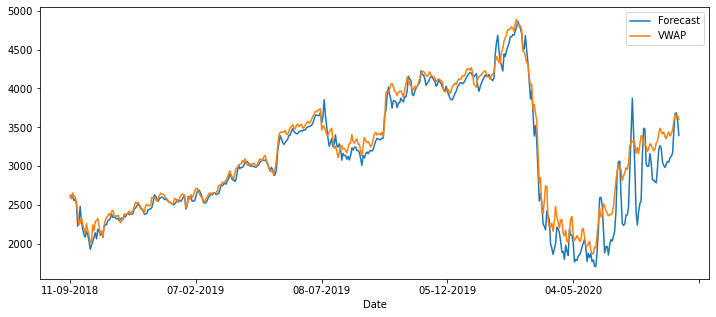

In [22]:
test_data[['Forecast','VWAP']].plot(figsize=(12,5));

# Accuracy of the model

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print(mean_squared_error(test_data['Forecast'],test_data['VWAP'],squared=False))

187.88333350202237
